training an RNN to do time seriesprediction.
Given an input data it is able to generate a
prediction for the next time step

# Import resources and Create our data

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

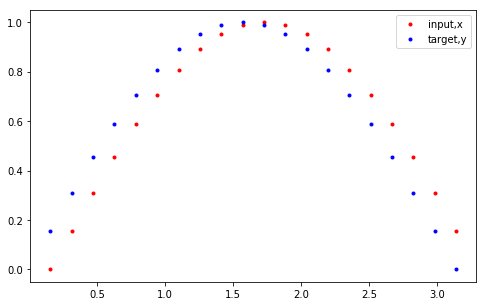

In [2]:
plt.figure(figsize=(8,5))
#no of time steps/data points are in 1 batch of data
seq_length=20

#generate evenly spaced time points
time_steps=np.linspace(0,np.pi,seq_length+1)
data=np.sin(time_steps)
data.resize((seq_length+1,1))#adds an input size dimension
x=data[:-1]#all but the last
y=data[1:]#all bt the first

#displaying the data
plt.plot(time_steps[1:],x,'r.',label='input,x')#x
plt.plot(time_steps[1:],y,'b.',label='target,y')#y
plt.legend(loc="best")
plt.show()

# Defining an RNN

In [3]:
# we'll use nn.RNN to create our rnn layer then add a fully connected layer 
#to get the output size we want
# an RNN takes in a number of parameters
#1.input_size;the size of the input
#2.hidden_dim;the number of features in the RNN output and the hiddden state
#3.n_layers;the number of layers that make up the RNN,
#greater than 1 means you are creating a stacked RNN
#4 whether or not,input/output of RNN would have batch size has first dimension
#(batch_size,seq_legth,hidden_dim)


In [4]:
class RNN(nn.Module):
    def __init__(self,input_size,output_size,hidden_dim,n_layers):
        super(RNN,self).__init__()
        self.hidden_dim=hidden_dim
        
        #defining an RNN with specified parameters
        #batch_first means the first dim of input and output would be the batch_size
        self.rnn=nn.RNN(input_size,hidden_dim,n_layers,batch_first=True)
        
        #last fully connected layer
        self.fc=nn.Linear(hidden_dim,output_size)
        
    def forward(self,x,hidden):
        batct_size=x.size(0)
        
        #get rnn outputs
        r_out,hidden=self.rnn(x,hidden)
        #shape the output to be (batch_size*seq_length,hiddedn_dim)
        r_out=r_out.view(-1,self.hidden_dim)
        
        #final output
        output=self.fc(r_out)
        
        return output,hidden
        
        

# check the input and output dimensions

In [5]:

#testing the dimensions as expected
test_rnn=RNN(input_size=1,output_size=1,hidden_dim=10,n_layers=2)
#we generate evenly spaced datga points
time_steps=np.linspace(0,np.pi,seq_length)
data=np.sin(time_steps)
data.resize((seq_length,1))

test_input=torch.Tensor(data).unsqueeze(0)#gives the batch size of the firstg dimension
print("INput size",test_input.size())

#test the rnn sizes
test_out,test_h=test_rnn(test_input,None)
print("output_size",test_out.size())
print("the hidden size state",test_h.size())

INput size torch.Size([1, 20, 1])
output_size torch.Size([20, 1])
the hidden size state torch.Size([2, 1, 10])


# TRAIN THE RNN 

In [6]:
#specify a series of hyparameters
input_size=1
output_size=1
hidden_dim=32
n_layers=1
#instantiate an rnn
rnn=RNN(input_size,output_size,hidden_dim,n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


# LOSS AND OPTIMIZATION

In [7]:
#this is aregression problem
#we gonna use MSE and Adam optimizer,learning rate of 0.01
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(rnn.parameters(),lr=0.01)



# DEFINING THE TRAINING FUNCTION

In [8]:
#function takes in rnn,number of training steps and returns atrained rnn
#also responsible for displaying the losses and predictions so often

##hidden state##

#note#
#1 before looping over a batch of training data, the hidden state wis initialized
#2.after a new hidden state is generated by the rnn,we use the latest hidden state
#and acts as an input for the following steps
def train(rnn,n_steps,print_every):
    
    #initialize hidden state
    hidden=None
    
    for batch_i,step in enumerate (range(n_steps)):
        #defining the training data
        time_steps=np.linspace(step*np.pi,(step+1)*np.pi,seq_length+1)
        data=np.sin(time_steps)
        data.resize((seq_length+1,1))#input size =1
        
        x=data[:-1]
        y=data[1:]
        
        #convert datga in to tensors
        x_tensor=torch.Tensor(x).unsqueeze(0)#unsqueeze gives a 1,batch dimension
        y_tensor=torch.Tensor(y)
        
        #outputs from rnn
        prediction,hidden=rnn(x_tensor,hidden)
        #make a new variable for hidden and detach the hidden state from its histor
        #now we dont backpropagate through thr entire history
        hidden=hidden.data
        
        #calculate the loss
        loss=criterion(prediction,y_tensor)
        #zero_gradientgs
        optimizer.zero_grad()
        #perform back_propagation and update the weights
        loss.backward()
        optimizer.step()
        
        #displaying the loss and the predictions
        if batch_i%print_every==0:
            print("Loss",loss.item())
            plt.plot(time_steps[1:],x,"r.")#for input
            plt.plot(time_steps[1:],prediction.data.numpy().flatten(),"b.")#for predictions
            plt.show()
            
    return rnn
        

Loss 0.2988646328449249


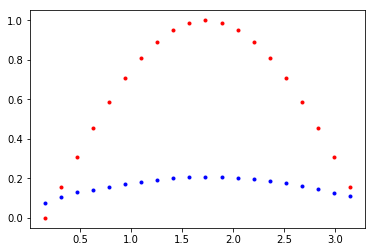

Loss 0.06982742995023727


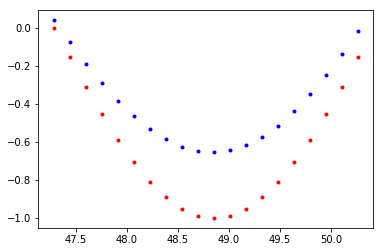

Loss 0.0018576530274003744


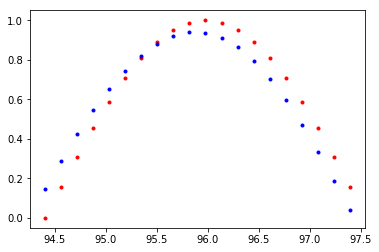

Loss 0.00045001061516813934


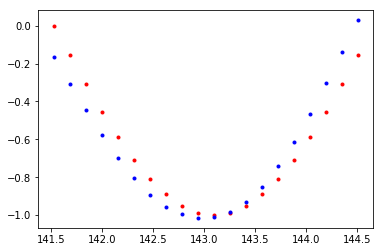

Loss 0.0001995104248635471


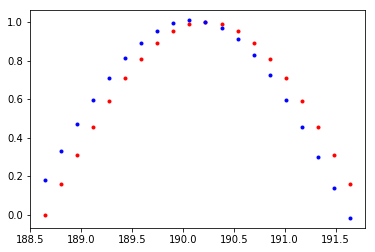

Loss 0.00022766977781429887


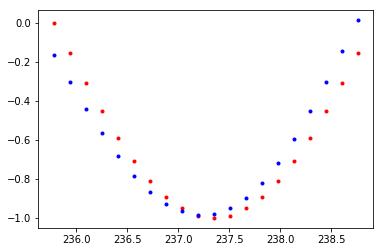

Loss 9.129598765866831e-05


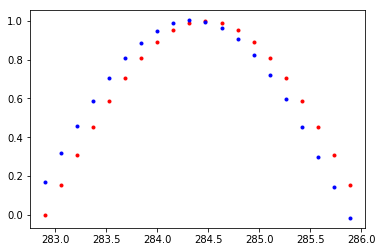

In [9]:
#now we train the rnn and monitor the results
n_steps=105
print_every=15
trained_rnn=train(rnn,n_steps,print_every)

In [10]:
#Time series can be applied in
#1.weather forcasting
#2.prediction stoke market prices

In [11]:
x=[1,2,3,4,5,7,8,9]

In [20]:
m=[n for n in range(0,100) if n%2==0]


In [21]:
print(m)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]


In [22]:
names=["Lawrence","Moruye","Denno","Felix"]
units=["Calculus","ODE","c++","Mathematics"]

In [23]:
my_dict={}
for name,unit in zip(names,units):
    my_dict[name]=unit
print(my_dict)

{'Lawrence': 'Calculus', 'Moruye': 'ODE', 'Denno': 'c++', 'Felix': 'Mathematics'}


In [25]:
my_dik={name:unit for name,unit in zip(names,units)}

In [26]:
print(my_dik)

{'Lawrence': 'Calculus', 'Moruye': 'ODE', 'Denno': 'c++', 'Felix': 'Mathematics'}
